In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("googleplaystore.csv")  # Ensure this file exists in the correct path


C:\Users\KHUSHI GUPTA\AppData\Local\Temp\ipykernel_6948\276786632.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


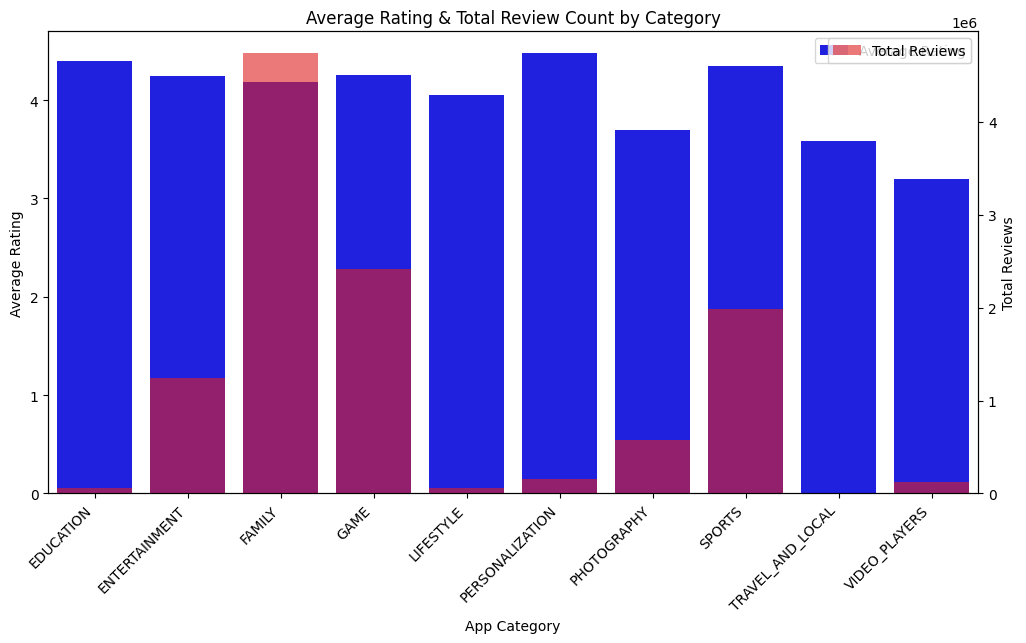

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("googleplaystore.csv")  

# Ensure 'Size' is a string before replacing 'M'
df['Size'] = df['Size'].astype(str).str.replace('M', '', regex=True)

# Convert 'Size' to numeric (coerce errors to NaN)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Installs' to numeric by removing non-numeric characters
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Convert 'Rating' to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Filter out categories with an average rating below 4.0
filtered_df = df.groupby('Category').filter(lambda x: x['Rating'].mean() >= 4.0)

# Filter out categories where 'Size' is below 10M
filtered_df = filtered_df[filtered_df['Size'] >= 10]

# Filter only apps last updated in January (Year is ignored)
filtered_df = filtered_df[filtered_df['Last Updated'].dt.month == 1]

# Get the top 10 categories by number of installs
top_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(10).index
filtered_df = filtered_df[filtered_df['Category'].isin(top_categories)]

# Aggregate data for visualization
category_data = filtered_df.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum'}).reset_index()

# Time-based restriction: Only show the graph between 3 PM - 5 PM IST
current_time = dt.datetime.now().time()
start_time = dt.time(15, 0)  # 3:00 PM IST
end_time = dt.time(17, 0)    # 5:00 PM IST

if start_time <= current_time <= end_time:
    # Plot grouped bar chart
    fig, ax = plt.subplots(figsize=(12, 6))

    # Bar chart with ratings
    sns.barplot(data=category_data, x="Category", y="Rating", color="blue", label="Average Rating", ax=ax)

    # Create a secondary y-axis for review count
    ax2 = ax.twinx()
    sns.barplot(data=category_data, x="Category", y="Reviews", color="red", alpha=0.6, label="Total Reviews", ax=ax2)

    # Labels and titles
    ax.set_ylabel("Average Rating")
    ax2.set_ylabel("Total Reviews")
    ax.set_xlabel("App Category")
    ax.set_title("Average Rating & Total Review Count by Category")
    
    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # Show plot
    plt.legend()
    plt.show()
else:
    print("⏳ This graph is only available between 3 PM - 5 PM IST.")


In [3]:
print(df.head())  # Show first 5 rows


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [4]:
if "Size" in df.columns:
    df['Size'] = df['Size'].astype(str).str.replace('M', '', regex=True)
    df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
else:
    print("Column 'Size' not found in the dataset.")
